In [2]:
import os


import pandas as pd
import numpy as np
# import sklearn

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


(383, 3)


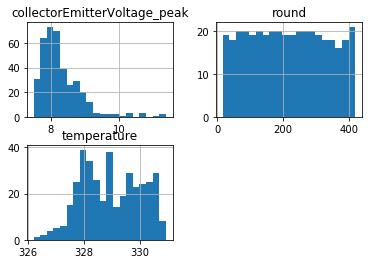

In [89]:
round_num_del = [1,2,3,4,5,6,7,8,9,10,11,12,13,24,35,46,112,223,334,386,375,364,
                 56,153,208,309,327,347,351,360,365,391
                ]
tempareture_df = pd.read_csv("collectorEmitterVoltage_peak_temperature.csv")
for num in round_num_del:
    tempareture_df = tempareture_df.loc[tempareture_df['round'].values != num,:]
tempareture_df = tempareture_df.loc[tempareture_df['temperature']>326,:]
print(tempareture_df.shape)
tempareture_df.hist(bins=20)
plt.show()

In [91]:
ix = np.all([tempareture_df["collectorEmitterVoltage_peak"].values<8.05,tempareture_df["collectorEmitterVoltage_peak"].values>7.95],axis = 0)
tempareture_df = tempareture_df.iloc[ix,:]
tempareture_df

,round,collectorEmitterVoltage_peak,temperature
153,154,8.0,329.420262
158,159,8.0,328.901999
168,169,8.0,329.902895
177,178,8.0,329.566024
178,179,8.0,328.629911
201,202,8.0,329.915852
202,203,8.0,330.634942
204,205,8.0,330.029222
208,209,8.0,329.378154
217,218,8.0,330.323984


In [ ]:
[203,246,284,297]


In [71]:
ix = np.all([tempareture_df["temperature"].values<330.05,tempareture_df["temperature"].values>329.95],axis = 0)
tempareture_df = tempareture_df.iloc[ix,:]
tempareture_df

,round,collectorEmitterVoltage_peak,temperature
36,37,8.8750,329.983874
65,66,8.5000,330.009787
98,99,8.2500,330.029222
107,108,8.1875,330.032461
118,119,8.1875,329.980635
144,145,8.0625,330.025983
147,148,7.9375,330.048657
149,150,8.1250,330.045418
196,197,7.8750,330.042178
204,205,8.0000,330.029222


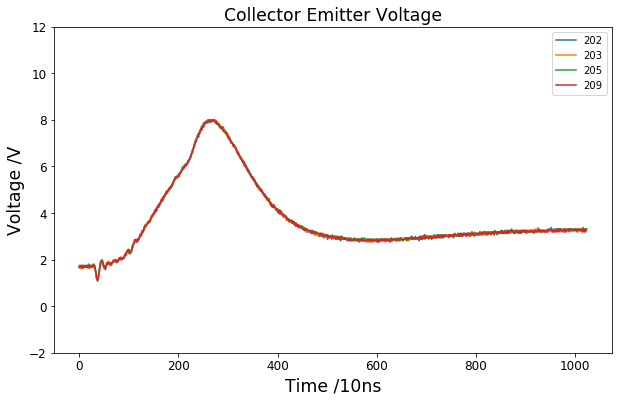

In [100]:
num_rounds = [51,113,186,252,303,37]
num_rounds = [66,150,243,366]
num_rounds = [203,246,284,297]
num_rounds = [202,203,205,209]
# num_rounds = [45,47,48,49,50]
# slice data
file_forder =  "./up_edge/"
file_forder = "./down_edge/"
suffix = ".csv"

plt.figure(figsize=(10, 6))
for file in num_rounds:
    sample_df = pd.read_csv(file_forder + str(file) +suffix )
    sample_name = tempareture_df.loc[file-1,"temperature"]
    sample_name = file
    plot_transient(sample_df,sample_name, file_forder,num=2)
#     plt.holdon()
plt.legend()
plt.show()
# plt.cla()
# plt.close("all")

In [98]:

# define plot and save function 
def plot_transient(sample_df,sample_name,save_dir, num = 0):
    # plot the time sequence parameter
    if( num == 0 ):
        plt.plot(sample_df.index.values, sample_df.gateSignalVoltage.values, label = str(sample_name))
        plt.title('Gate Signal Voltage',fontsize ='xx-large' )
        plt.xlabel('Time /10ns',fontsize ='xx-large')
        plt.ylabel('Voltage /V',fontsize ='xx-large')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.ylim([-2,12])
    if( num == 1 ):
        plt.plot(sample_df.index.values, sample_df.gateEmitterVoltage.values, label = str(sample_name))
        plt.title('Gate Emitter Voltage',fontsize ='xx-large' )
        plt.xlabel('Time /10ns',fontsize ='xx-large')
        plt.ylabel('Voltage /V',fontsize ='xx-large')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.ylim([-2,12])
    if( num == 2 ):
        plt.plot(sample_df.index.values, sample_df.collectorEmitterVoltage.values, label = str(sample_name))
        plt.title('Collector Emitter Voltage',fontsize ='xx-large' )
        plt.xlabel('Time /10ns',fontsize ='xx-large')
        plt.ylabel('Voltage /V',fontsize ='xx-large')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.ylim([-2,12])
#         plt.ylim([1,4])
    if( num == 3 ):
        # collectorEmitterCurrentSingal
        # plot the time sequence parameter
        try:
            plt.plot(sample_df.index.values, sample_df.collectorEmitterCurrentSingal.values, label = str(sample_name))
            plt.title('Collector Emitter Current',fontsize ='xx-large' )
        except:
            plt.plot(sample_df.index.values, sample_df.P.values, label = str(sample_name))
            plt.title('Power ',fontsize ='xx-large' )
        plt.xlabel('Time /10ns',fontsize ='xx-large')
        plt.ylabel('Current /A',fontsize ='xx-large')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)



In [ ]:

PLOT_FEATURE = False
DROP_OUTLIERS = True
# drop outl
round_num_del = [1,2,3,4,5,6,7,8,9,10,11,12,13,24,35,46,112,223,334,386,375,364,
                 56,153,208,309,327,347,351,360,365,391
                ]

train_df = pd.read_csv('./temp/train_feature_df_subsample.csv')
if DROP_OUTLIERS:
    for num in round_num_del:
        train_df = train_df.loc[train_df['num_cycle'].values != num,:]
train_df = train_df.loc[train_df['temperature']>326,:]
if PLOT_FEATURE:
    plot_feature1(train_df,"num_cycle",feature_pic_dir)
train_df.to_csv("./temp/train_feature_df_outliers_subsample.csv",index = False)

# show info
print(train_df.shape)
train_df.head()